<a href="https://colab.research.google.com/github/boerndtz/fer2013/blob/master/BK_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle4"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle4
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle4


In [4]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

 95% 407M/427M [00:06<00:00, 49.6MB/s]
100% 427M/427M [00:07<00:00, 63.2MB/s]


In [5]:
!ls

diabetic-retinopathy-224x224-gaussian-filtered.zip  kaggle.json
gaussian_filtered_images			    train.csv


In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
replace gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/export.pkl
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png
/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images/gaussian_filtered_

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle4/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2930 images belonging to 1 classes.
Found 732 images belonging to 1 classes.


USING EFFICIENT NET

In [10]:
!pip install -q efficientnet


In [11]:
import efficientnet.tfkeras as efn


In [12]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [13]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [14]:
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=40,verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
92/92 [==============================] - 66s 613ms/step - loss: 10.6079 - acc: 0.1823 - val_loss: 12.8968 - val_acc: 0.2609
Epoch 2/40
92/92 [==============================] - 54s 588ms/step - loss: 8.5536 - acc: 0.1254 - val_loss: 11.0688 - val_acc: 0.0000e+00
Epoch 3/40
92/92 [==============================] - 54s 587ms/step - loss: 8.2698 - acc: 0.1312 - val_loss: 10.1201 - val_acc: 0.0000e+00
Epoch 4/40
92/92 [==============================] - 54s 590ms/step - loss: 8.2237 - acc: 0.0499 - val_loss: 9.5496 - val_acc: 0.0000e+00
Epoch 5/40
92/92 [==============================] - 55s 593ms/step - loss: 8.2635 - acc: 0.0335 - val_loss: 8.7567 - val_acc: 0.0000e+00
Epoch 6/40
92/92 [==============================] - 55s 592ms/step - loss: 8.2144 - acc: 0.0191 - val_loss: 8.2879 - val_acc: 0.0000e+00
Epoch 7/40
92/92 [==============================] - 55s 592ms/step - loss: 8.1941 - acc: 0.0092 - val_loss: 8.1154 - val_acc: 0.0000e+00
Epoch 8/40
92/92 [=======================

We got smoother validation and training curves.¶


In [15]:
import matplotlib.pyplot as plt


In [16]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

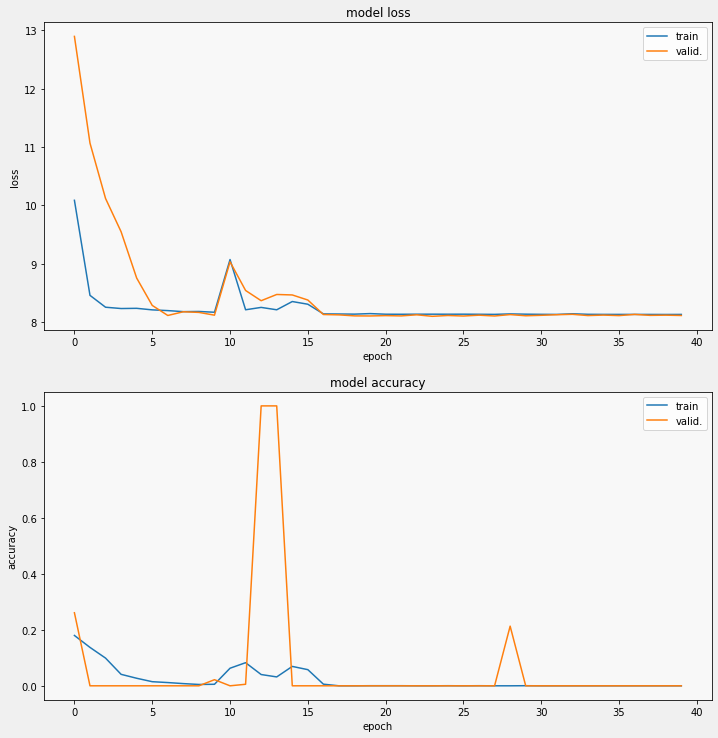

In [17]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)